In [50]:
#Script created by Neha on 2022-10-04
#Script is designed to analyze Applebees Site traffic analysis on APP only
#Github repo: https://github.com/matt-walentosky-bt/applebees_user_pathing_analysis

In [1]:
#Import desired packages
import ga4_user_pathing
import pandas as pd
import os

In [2]:
#Parameters from Tyler Norris / Vanessa Schneider
# Globals:
COUNT_FIELD = 'counts' # DF fields references to aggregations value (users, sessions)
NODE_OPACITY = .9
LINK_OPACITY = .6
SEP_VAL = ' > '
KEY_PATH = '/Users/vanessaschneider/keys/dse-chase-user-pathing.json'

In [3]:
#Get working directory
os.getcwd()

'/Users/nehakhatri/Documents/GitHub/applebees_user_pathing_analysis'

In [4]:
#Read desired document
conversion_status = True

if conversion_status == True:
    df = pd.read_csv("APP_converters_user_pathing.csv")
else:
    df = pd.read_csv("APP_non_converters_user_pathing.csv")
    
#Note, we can only pull fraction of data from BQ into CSV format   

In [5]:
print(df.shape)
print("----")
print(df.head())

(9397, 3)
----
                                             journey  conversion_flg  counts
0  StoreTableViewController > GuidedMenuViewContr...            True    1052
1  GuidedMenuViewController > Entrees > GuestChec...            True     754
2  StoreTableViewController > GuidedMenuViewContr...            True     625
3  StoreTableViewController > GuidedMenuViewContr...            True     624
4      BasketViewController > CheckoutViewController            True     557


In [6]:
df['journey_length'] = df.apply(lambda x: len(x['journey'].split(SEP_VAL)), axis=1)

In [7]:
df.describe()

,counts,journey_length
count,9397.000000,9397.000000
mean,3.020964,14.726828
std,22.021538,6.525744
min,1.000000,1.000000
25%,1.000000,11.000000
50%,1.000000,13.000000
75%,1.000000,17.000000
max,1052.000000,88.000000


In [8]:
df.head(21)

,journey,conversion_flg,counts,journey_length
0,StoreTableViewController > GuidedMenuViewContr...,True,1052,5
1,GuidedMenuViewController > Entrees > GuestChec...,True,754,4
2,StoreTableViewController > GuidedMenuViewContr...,True,625,4
3,StoreTableViewController > GuidedMenuViewContr...,True,624,7
4,BasketViewController > CheckoutViewController,True,557,2
5,GuidedMenuViewController > GuestCheckoutTableV...,True,502,3
6,GuidedMenuViewController > Entrees > GuidedMen...,True,394,6
7,StoreTableViewController > GuidedMenuViewContr...,True,392,5
8,GuestCheckoutTableViewController > CheckoutVie...,True,314,2
9,GuidedMenuViewController > Entrees > BasketVie...,True,310,4


<AxesSubplot: >

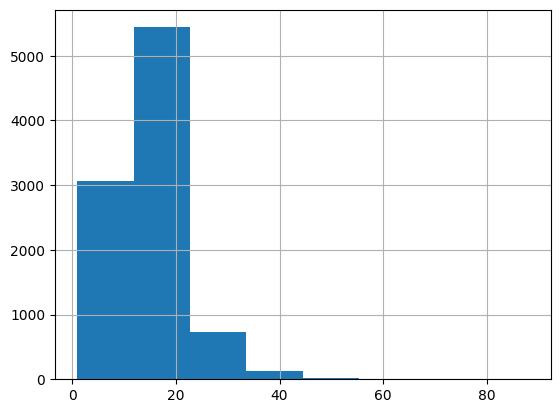

In [9]:
# Change min journey lenght and number of bins to further explore
df[df['journey_length'] > 0]['journey_length'].hist(bins=8)

<AxesSubplot: >

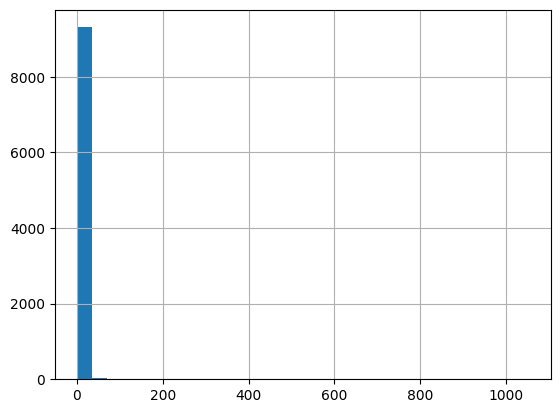

In [10]:
df[df['journey_length'] > 1]['counts'].hist(bins=30)

In [11]:
df.head(10)

,journey,conversion_flg,counts,journey_length
0,StoreTableViewController > GuidedMenuViewContr...,True,1052,5
1,GuidedMenuViewController > Entrees > GuestChec...,True,754,4
2,StoreTableViewController > GuidedMenuViewContr...,True,625,4
3,StoreTableViewController > GuidedMenuViewContr...,True,624,7
4,BasketViewController > CheckoutViewController,True,557,2
5,GuidedMenuViewController > GuestCheckoutTableV...,True,502,3
6,GuidedMenuViewController > Entrees > GuidedMen...,True,394,6
7,StoreTableViewController > GuidedMenuViewContr...,True,392,5
8,GuestCheckoutTableViewController > CheckoutVie...,True,314,2
9,GuidedMenuViewController > Entrees > BasketVie...,True,310,4


In [12]:
df = ga4_user_pathing.add_journey_end_string(df, journey_col='journey', conversion_column='Conversion', sep_val=' > ')
df = ga4_user_pathing.parse_steps(df, sep_val=' > ', max_steps=10)

In [13]:
df['journey'][1]

'GuidedMenuViewController > Entrees > GuestCheckoutTableViewController > CheckoutViewController > Journey End'

In [ ]:
#df_filtered.columns

In [66]:
#df_filtered = ga4_user_pathing.remove_long_tail_jouneys(df, count_col='counts', min_path_count=10)

In [14]:
df_filtered = df[(df['journey_length'] >= 5) & (df['journey_length'] <= 10)]
df_filtered = df_filtered.sort_values('counts', ascending = False)
df_filtered = df_filtered.iloc[0:10,:]

In [15]:
df_sankey, df_index = ga4_user_pathing.generate_sankey_inputs(df_filtered, COUNT_FIELD, .9)

/Users/nehakhatri/Documents/GitHub/applebees_user_pathing_analysis/ga4_user_pathing.py:253: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  right_on='value').drop('value', 1)
/Users/nehakhatri/Documents/GitHub/applebees_user_pathing_analysis/ga4_user_pathing.py:261: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  right_on='value').drop('value', 1)


In [16]:
df_sankey.head()

,source,target,counts,source_index,color,target_index
0,Appetizers,GuestCheckoutTableViewController,1045,6,"rgba(255, 177, 255, 0.9)",4
1,Appetizers,GuidedMenuViewController,660,6,"rgba(255, 177, 255, 0.9)",0
2,BasketViewController,CheckoutViewController,280,7,"rgba(25, 126, 178, 0.9)",2
3,CheckoutViewController,Journey End,3884,2,"rgba(45, 27, 181, 0.9)",3
4,Entrees,BasketViewController,280,1,"rgba(53, 41, 127, 0.9)",7


In [17]:
df_filtered

,journey,conversion_flg,counts,journey_length,step_1,step_2,step_3,step_4,step_5,step_6,step_7,step_8,step_9,step_10
0,StoreTableViewController > GuidedMenuViewContr...,True,1052,5,StoreTableViewController,GuidedMenuViewController,Entrees,GuestCheckoutTableViewController,CheckoutViewController,Journey End,NaN,NaN,NaN,NaN
3,StoreTableViewController > GuidedMenuViewContr...,True,624,7,StoreTableViewController,GuidedMenuViewController,Entrees,GuidedMenuViewController,Entrees,GuestCheckoutTableViewController,CheckoutViewController,Journey End,NaN,NaN
6,GuidedMenuViewController > Entrees > GuidedMen...,True,394,6,GuidedMenuViewController,Entrees,GuidedMenuViewController,Entrees,GuestCheckoutTableViewController,CheckoutViewController,Journey End,NaN,NaN,NaN
7,StoreTableViewController > GuidedMenuViewContr...,True,392,5,StoreTableViewController,GuidedMenuViewController,Appetizers,GuestCheckoutTableViewController,CheckoutViewController,Journey End,NaN,NaN,NaN,NaN
11,StoreTableViewController > GuidedMenuViewContr...,True,280,5,StoreTableViewController,GuidedMenuViewController,Entrees,BasketViewController,CheckoutViewController,Journey End,NaN,NaN,NaN,NaN
12,StoreTableViewController > GuidedMenuViewContr...,True,245,9,StoreTableViewController,GuidedMenuViewController,Entrees,GuidedMenuViewController,Entrees,GuidedMenuViewController,Entrees,GuestCheckoutTableViewController,CheckoutViewController,Journey End
13,StoreTableViewController > GuidedMenuViewContr...,True,244,7,StoreTableViewController,GuidedMenuViewController,Appetizers,GuidedMenuViewController,Entrees,GuestCheckoutTableViewController,CheckoutViewController,Journey End,NaN,NaN
14,StoreTableViewController > GuidedMenuViewContr...,True,237,7,StoreTableViewController,GuidedMenuViewController,Entrees,GuidedMenuViewController,Appetizers,GuestCheckoutTableViewController,CheckoutViewController,Journey End,NaN,NaN
16,StoreTableViewController > GuidedMenuViewContr...,True,231,7,StoreTableViewController,GuidedMenuViewController,Appetizers,GuidedMenuViewController,Appetizers,GuestCheckoutTableViewController,CheckoutViewController,Journey End,NaN,NaN
18,GuidedMenuViewController > Appetizers > Guided...,True,185,6,GuidedMenuViewController,Appetizers,GuidedMenuViewController,Appetizers,GuestCheckoutTableViewController,CheckoutViewController,Journey End,NaN,NaN,NaN


In [18]:
ga4_user_pathing.display_sankey(df_sankey, df_index, count_field=COUNT_FIELD, link_opacity=.3)